# ARE 258 Replication Workshop 4 (Template)
## Article: Modelling trends in food market integration: Method and an application to Tanzanian maize markets
### Author: Bjorn Van Campenhout
### Date: 05/25/2022
### Team 4
### Name: Valentina, Adreanna, Pin-Ling

# About this notebook
- The section titles starting with **D..** are the ones where we do some hands-on coding. These titles are in black.
- The section titles starting with **Q..** Contain the write-up questions. These sections are in <span style="color:green">green</span> 
- Titles in <span style="color:blue">blue</span> are notes to guide you

- IMPORTANT: This workshop is a graded assignment and your submission will be graded based on:
    - completeness of your code
    - quality your answer to the questions (the sections with green titles)

# <span style="color:blue">A quick overview of the article</span>
**Objective**: devise a better strategy to test for market integration in developing countries.

**Motivation**: Why do we care about market integration? (1 ${ }^{\text {st }}$ para, p112-113)

Lack of market integration in developing countries poses several dangers. First, in many instances, famine does not arise because there is not enough food, but because poor market integration leads to localized scarcity. Second, when rural households are isolated from markets, they cannot get their goods to market, which can keep them in subsistence farming and poverty. Third, poor market integration can make it difficult for governments to implement successful price stabilization policies.

**Methodology:** How do we know if markets are integrated? What does the theory tell us?
Markets are integrated if they are connected by arbitrage. Arbitrage is when one can make a profit by moving goods from one market to another (i.e. the price difference is greater than the transaction costs).

Suppose a trader notices that in period $t$, the price in market 2 is lower than the price in market 1 , and the difference is greater than the transaction cost $\tau$ :
$$
P_{t}^{1}-P_{t}^{2}>\tau
$$
She starts moving goods from market 2 to market 1 because she can make a profit. The price of goods in market 1 decreases as supply increases, and the price of goods in market 2 increases as demand increases. She will continue moving goods until:
$$
P_{t}^{1}-P_{t}^{2}=\tau
$$
At this point she stops because moving any more goods from market 2 to market 1 would result in price changes that would lead to losses.

Now suppose in period $t+1$ there is a drought in market 2 , making the price in market 2 higher, so the price relationship is:
$$
P_{t}^{1}-P_{t}^{2}<\tau
$$
The trader will not move goods in either direction. The prices can still adjust locally under this condition, but they won't move together in period $t+1$.
Does this mean the markets are not integrated?
Not necessarily. If one market price changes so that:
$$
\left|P_{t}^{1}-P_{t}^{2}\right|>\tau
$$
Then the trader will start moving goods again.

**Empirical Strategy**: How do we measure adjustment speed?
- Define the difference in prices between market $r$ and the reference market at time $t$ as:
$$
m_{t}=p_{t}-p_{r, t}
$$
- Define the difference (from $t$ to $t-1$ ) in the difference of prices (from market $r$ to the baseline market) as:
$$
\Delta m_{t}=m_{t}-m_{t-1}
$$
- Specify the difference in the difference in prices $t$ as a proportion of the difference in prices in period $t-1$, plus an error term, distributed normally around zero.
$$
\Delta m_{t}=\rho \cdot m_{t-1}+\varepsilon_{t}
$$
This is a simple autoregression (AR1) model.

# <span style="color:green">Q1. What does $\rho$ measure? What does a large negative value of $\rho$ indicate?  </span>

$\rho$ measures the adjustment speed and the magnitude that prices in the previous period are corrected. A large negative $\rho$ indicates a very delayed and slow price adjustment in the market.
We can see from the equation: $$
\Delta m_{t}=\rho \cdot m_{t-1}+\varepsilon_{t}
$$
It shows how quickly price differences from the previous period are corrected. The larger the negative value of $\rho$, the larger the adjustment rate of the "lag spread". The author uses this parameter to calculate half-lives. When $\rho$ is large and negative, we get lower half-life values.

# D0. Initial setup
Note, below is the structure of the data:

1. Reference market: 
    - Iringa (`piringa`)

2. Markets of interests: 
    - Dodoma (`pdodoma`)
    - Morogoro (`pmorogoro`)
    - Mbeya (`pmbeya`)
    - Songea (`psongea`)
    - Dar es Salaam (`pdaressalaam`)
    - Sumbawanga (`psumbawanga`)

3. moving variable: 
    - weekly data from 1989w1 to 1999w52 (`movar`) 


In [ ]:
clear
set more off
use "maizeCPI.dta", clear
set scheme s1mono

In [ ]:
%head

,test,CPI2,parusha,pbukoba,pdaressalaam,pdodoma,piringa,pkigoma,plindi,pmbeya,pmorogoro,pmoshi,pmtwara,pmusoma,pmwanza,pshinyanga,psingida,psongea,psumbawanga,ptabora,ptanga,movar,_merge
1,1989w1,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w1,3
2,1989w2,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w2,3
3,1989w3,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w3,3
4,1989w4,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w4,3
5,1989w5,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w5,3
6,1989w6,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w6,3
7,1989w7,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w7,3
8,1989w8,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w8,3
9,1989w9,11.5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w9,3
10,1989w10,11.50833336512248,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1989w10,3


# D1. The price data are from the Famine Early Warning System.  Someone goes to the market each week and writes down the prevailing market price of the good (white maize).  Open the data. What type of data do we have? Declare it using the appropriate Stata command(s).  
- hint: use `tsset`

In [ ]:
tsset movar 

// It's time series data


Time variable: movar, 1989w1 to 1999w52
        Delta: 1 week


# <span style="color:green">Q2.How many markets do we have?  What is the reference market and why does the author choose it?  </span>

We have seven geographically distinct markets, one of which is designated as the reference market. We observe 6 market pairings in Table 1. Iringa is the reference market because it is a central hub for the supply of maize for the country, has a strong preference for the crop being investigated (maize), and is centrally located. It is chosen because of its geographic situation since there are rods or other highways that connect it with other selected markets in all directions.

# D2.Instead of controlling for inflation using the CPI the author defines the price difference as the share of average price level of the two markets (the reference market and the market in question). 
- Calculate these shares for the villages the author analyses. 
- Drop the observations where the price data are not available for most of the locations. 
- Note: footnote 10 talks about why we need the adjustment.  (page 120)


In [ ]:
foreach var of varlist pdodoma pmorogoro pmbeya psongea pdaressalaam psumbawanga {
    cap gen m`var' = (`var' - piringa)/((piringa + `var')/2)*100
}
drop if movar<w(1989w37)
drop if movar>=w(1999w19)



(36 observations deleted)

(34 observations deleted)


# <span style="color:green">Q3. Calculate the correlation between the shares you just calculated.  Interpret.   </span>
- you can use stata's `corr`  for this.

We can see from the result that the correlation of price difference between Dar es Salaam-Iringa and Mbeya-Iringa is the highest at 0.6345. And the lowest is between Sumbawanga-Iringa and Songea-Iringa, 0.2493. 

In [ ]:
corr mpdodoma mpmorogoro mpmbeya mpsongea mpdaressalaam mpsumbawanga

(obs=184)

             | mpdodoma mpmoro~o  mpmbeya mpsongea mpdare~m mpsumb~a
-------------+------------------------------------------------------
    mpdodoma |   1.0000
  mpmorogoro |   0.5262   1.0000
     mpmbeya |   0.3483   0.4431   1.0000
    mpsongea |   0.2977   0.3334   0.5090   1.0000
mpdaressal~m |   0.3890   0.4991   0.6345   0.5156   1.0000
mpsumbawanga |   0.3304   0.4726   0.5151   0.2493   0.4241   1.0000



# D3. Estimate the AR1 model for the study villages. 
- Use time series commands `d.` and `l.` (i.e., DO NOT create new variables).  
- Note there is no constant in the model.  
- Your results should match the first column of Table 1. 
- After each regression, save the estimate of $\rho$. Use the naming `rho_nameofmarket1` (eg. `rho_dodoma`). 
- Report your results in a neat table. Call it Table 1.

In [ ]:
foreach var of varlist mpdodoma mpmorogoro mpmbeya mpsongea mpdaressalaam mpsumbawanga {
    quietly regress d.`var' l.`var', noconstant 
    scalar rho_`var'= _b[l.`var'] 
}
scalar list



rho_mpsumbawanga = -.08852466
rho_mpdaressalaam = -.03022146
rho_mpsongea = -.07761894
rho_mpmbeya = -.16207399
rho_mpmorogoro = -.07727745
rho_mpdodoma = -.14303493


| Market Pair | rho |
|- |- |
|Dodoma-Iringa |-0.14303493 |
| Morogoro-Iringa | -0.07727745 |  
| Mbeya-Iringa | -0.16207399 |  
| Songea-Iringa | -0.07761894 | 
| Dar Es Salaam-Iringa | -0.03022146 |  
|Sumbawanga-Iringa | -0.08852466 |


# <span style="color:blue">Derivation of the Expression for Half-life </span>
We can derive the expression for half-life based on the following statement in the paper:
> The only parameter we estimate at this stage is $\rho$, which is the adjustment speed. It indicates the extent to which price differences in the previous period are 'corrected', and is the basis to calculate half-lives.

The above statement suggests that the author derived the expression of half-life from the following equation:
$$
\Delta m_{t}=\rho \cdot m_{t-1}+\varepsilon_{t} \qquad(1)
$$
We can rearrange equation (1) as follows:
$$
\begin{aligned}
&m_{t}-m_{t-1}=\rho \cdot m_{t-1}+\varepsilon_{t} \\
&m_{t}=\rho \cdot m_{t-1}+m_{t-1}+\varepsilon_{t} \\
&m_{t}=m_{t-1}(1+\rho)+\varepsilon_{t} \\
&E_{t-1}\left(m_{t}\right)=m_{t-1}(1+\rho) \quad \text { since } \varepsilon_{t} \sim N\left(0, \sigma^{2}\right)
\end{aligned}
$$
Ignoring the expectation operator, we get:
$$
\frac{m_{t}}{m_{t-1}}=(1+\rho)
$$
Taking logarithms of both sides:
$$
\ln \left(\frac{m_{t}}{m_{t-1}}\right)=\ln (1+\rho)
$$
Another way of expressing the above equation is:
$$
\ln \left(\frac{m_{t+1}}{m_{t}}\right)=\ln (1+\rho) \qquad(2)
$$
Since $m_{t}$ follows an exponential decay process, its decay over time is represented by the expression:
$$
\ln \left(\frac{m_{t+h}}{m_{t}}\right)=-\lambda h  \qquad(3)
$$
where $\lambda$ denotes the decay constant.

Comparing equation (2) and (3), we see that equation (2) represents the decay of the price difference $m$ over 1 period $(h=1)$ :
$$
\ln \left(\frac{m_{t+(1)}}{m_{t}}\right)=-\lambda(1) \qquad(3^\prime)
$$
Now comparing equation $\left(3^{\prime}\right)$ to $(2)$, we see that $-\lambda=\ln (1+\rho)$. Therefore, we can express the decay process for price differences over time generally as:
$$
\ln \left(\frac{m_{t+h}}{m_{t}}\right)=\ln (1+\rho) h  \qquad(4)
$$
To derive the expression for half-life, we solve for $h$ for the case where $m_{t+h} / m_{t}=0.5$ :
$$
\ln (0.5)=\ln (1+\rho) h
$$
$$
h=\frac{\ln (0.5)}{\ln (1+\rho)}
$$

# <span style="color:green"> Q4. What is the definition of half-life? Why do you think the author calculates the half lives?  </span>
- See footnote 9.

Half-life is the time needed for a given price shock to return to half its initial value, and its values are expressed in weeks in the output. By definition  $0.5=\frac{m_{t+h}}{m_{t}}$, hence we only need to estimate the $\rho$'s in order to derive the half-life using the last expression above. $\rho$ is the adjustment speed and indicates how much price differences in the previous period are adjusted. 
By calculating the half-lives, the author could give a more specific interpretation and provide a better indicator for policymakers. That is, policymakers can get a forecast of how long it will take for the price shock to recover and the predicted date of recovery.

# D4.Write a loop to calculate half-life for the study villages. 
- Use the naming `half_nameofmarket1` (eg. `half_dodoma`).  
- Your results should match the 2nd column of table 2. 
- Add your results to your Table 1. Stata does this faster, but you can also manually do  this.  


In [ ]:
foreach var in mpdodoma mpmorogoro mpmbeya mpsongea mpdaressalaam mpsumbawanga{
    quietly regress d.`var' l.`var', noconstant 
    scalar half_`var' = ln(0.5)/ln(1+ _b[l.`var'])
}
scalar list 



half_mpsumbawanga =  7.4780625
half_mpdaressalaam =  22.587249
half_mpsongea =  8.5788889
half_mpmbeya =  3.9199508
half_mpmorogoro =  8.6183732
half_mpdodoma =  4.4905131
rho_mpsumbawanga = -.08852466
rho_mpdaressalaam = -.03022146
rho_mpsongea = -.07761894
rho_mpmbeya = -.16207399
rho_mpmorogoro = -.07727745
rho_mpdodoma = -.14303493


| Market Pair | AR1 $\rho$ | AR1 Half-life |
|- |- |-|
|Dodoma-Iringa |-0.14303493 | 4.4905131 |
| Morogoro-Iringa | -0.07727745 | 8.6183732 | 
| Mbeya-Iringa | -0.16207399 | 3.9199508 | 
| Songea-Iringa | -0.07761894 | 8.5788889 |
| Dar Es Salaam-Iringa | -0.03022146 | 22.587249 | 
|Sumbawanga-Iringa | -0.08852466 | 7.4780625 |


# <span style="color:green">Q5. Answer the following sub-questions: </span>
Q5.1. If the difference in prices lies within the price band, will transactions take place?  
Q5.2. If no transaction take place, should the price difference adjust?  
Q5.3. Explain the theory the author imposes on the TAR model: 
$\Delta m_{t}=\left\{\begin{array}{lll}\rho_{\text {out }} m_{t-1}+\varepsilon_{t} & & m_{t-1}>\theta, \\ \varepsilon_{t} & \text { if } & -\theta \leqslant m_{t-1} \leqslant \theta, \\ \rho_{\mathrm{out}} m_{t-1}+\varepsilon_{t} & & m_{t-1}<-\theta .\end{array}\right.$

Q5.4. Interpret the following sentence: 
> …Prices will move independently, although it would be wrong to conclude from this that these markets are not integrated. (See para 3, p114)

(Q5.1) When the price difference is higher than the transaction cost, the trader can get an arbitrage profit and the transaction will happen. But when the spread is lower than the transaction cost, traders tend to hoard products instead. Therefore, in this case, there will be no transaction. The price difference in the next period is the price difference in this period.


(Q5.2) Inside the band of transaction costs, there is no price adjustment. This is why we can set $\rho_{\text {in}}$ = 0.  
.

(Q5.3) Transaction costs are constant over time, so the authors model $\theta$ as linear function of time. The authors also add a time trend to the adjustment parameter. Then they capture shocks to the adjustment parameter by adding a dummy variable. 


(Q5.4) This sentence awknowledges that prices in each market are determined by their unique local demand and supply environments, however market integration through arbitrage still impacts price adjustments and transaction costs. 

# D5. Estimating the TAR model is complicated.  Luckily, the author wrote a routine for it, which they made available.  Run the `.ado` file `TARestR2.ado`. 
- Don’t forget to fix the `.ado` file codes using the `capture program drop` command. 
- Now Stata will know what to do when you use the `TARestR2` command.  
- You will also need to run the `halflife.ado` file because the `TARestR2` calls that routine.  
- Estimate the TAR model for the study villages. This should look like the 2nd column of Table 2. 
- Include a command that displays your estimates. And add your results to the table you created above.

In [ ]:
capture program drop TARestR2
capture program drop halflife
qui do "halflife.ado"
qui do "TARestR2.ado"

In [ ]:
local markets "mpdodoma mpmorogoro mpmbeya mpsongea mpdaressalaam mpsumbawanga"
foreach var in `markets' {
    qui TARestR2 `var' 
    cap gen thresh_`var' = e(threshold)
    ereturn list
}




scalars:
                  e(N) =  295
               e(df_m) =  1
               e(df_r) =  294
                  e(F) =  24.32739021575315
                 e(r2) =  .076422547865783
               e(rmse) =  9.351915828975427
                e(mss) =  2127.632913554593
                e(rss) =  25712.7489236389
               e(r2_a) =  .0732811279605644
                 e(ll) =  -1077.582478940436
               e(rank) =  1
          e(threshold) =  8.588956832885742

macros:
            e(cmdline) : "regress dependent intvarout, nocons"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "dependent"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 1
                  e(V) :  1 x 1
             e(regime) :  3 x 1
              e(o

| Market Pair | AR1 $\rho$ | AR1 Half-life | TAR Model $\theta$|
|- |- |- |- |
|Dodoma-Iringa |-0.14303493 | 4.4905131 | 8.5889568 |
| Morogoro-Iringa | -0.07727745 | 8.6183732 | 21.514847 | 
| Mbeya-Iringa | -0.16207399 | 3.9199508 | 9.1805363 |
| Songea-Iringa | -0.07761894 | 8.5788889 | 25 |
| Dar Es Salaam-Iringa | -0.03022146 | 22.587249 | 43.951157 |
|Sumbawanga-Iringa | -0.08852466 | 7.4780625 | 30.280039|

# <span style="color:green"> Q6. Compare the estimates from the TAR model statistically with the estimates from the AR1 model. What can you conclude? </span>


It is evident from the comparison of the TAR and AR1 models that the adjustment rates have increased for all trade routes. The adjustment parameters for all routes have increased dramatically. But our estimated $\theta$ are very different from the paper. There may be some considerations that are missing. 

# D6. Graph the price difference over time for each market.
- itt should be a $2\times3$ panel

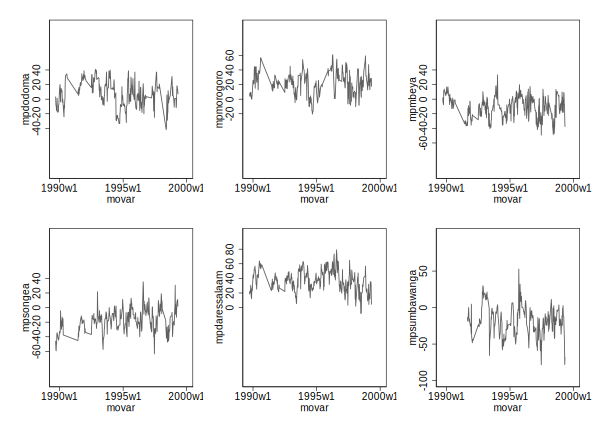

In [ ]:
cap graph drop *
local markets "mpdodoma mpmorogoro mpmbeya mpsongea mpdaressalaam mpsumbawanga"

foreach var in `markets' {
    qui tsline `var', yscale(range(-100 100))
    qui graph save `var'.gph, replace
}
graph combine mpdodoma.gph mpmorogoro.gph mpmbeya.gph mpsongea.gph mpdaressalaam.gph mpsumbawanga.gph



# <span style="color:green">Q7. Interpret the graph from D6.   </span>


Dar es Salaam-Iringa is the only trade route that had a positive price difference most of the time, which gives us the information that the price in Dar es Salaam was usually higher than the reference market, Iringa( See the chart in the middle of the bottom row). However, the remaining 5 trade routes have both positive and negative price differences, meaning that maize stock flows in these market pairs have high fluctuated over time. Due to differences in geographic regions or agricultural harvesting seasons, it is difficult to always have a higher price in one market than another.

# <span style="color:green">Q8. Should $\theta$ be constant over time? Why might it change?  </span>

- In the preferred model, the author lets $\theta$ change linearly within the model:
$ \theta_{t}=\theta_{0}+\frac{\left(\theta_{T}-\theta_{0}\right)}{T} \cdot t $

- The author also allows $\rho$ to change over time: 
$\Delta m_{t}= \begin{cases}\rho_{\mathrm{out}} m_{t-1}+\rho_{\text {out }}^{\prime} \cdot t \cdot m_{t-1}+\varepsilon_{t} & \text { if } \quad m_{t-1}>\theta_{t} \\ \varepsilon_{t} & \text { if } \quad-\theta_{t} \leqslant m_{t-1} \leqslant \theta_{t} \\ \rho_{\text {out }} m_{t-1}+\rho_{\text {out }}^{\prime} \cdot t \cdot m_{t-1}+\varepsilon_{t} &\text { if } \quad  m_{t-1}<-\theta_{t}\end{cases}$

- The start and end values of $\theta$ are selected using a grid search, which is similar to finding the "best" point for a structural change.

The threshold $\theta$ does not have to be constant over time. The assumption that transaction costs are constant over time is one of the shortcomings of the general TAR model. Having $\theta$ vary over time allows us to capture the dynamic nature of the market, as many factors may change transaction costs (threshold). For example, the agents' cost and risk associated with the trade between two markets could be the reason that causes the variation in transaction cost. Additionally, since the main product discussed in this paper is an agricultural commodity – maizes, which has great variation across seasons and locations and even the stock flows that all relate with and could alter the transaction costs.

# D7. Estimate this more flexible model for Dar es Salaam. 
- The routine is slow so we will only look at one village-the one that is possibly segmented. 
- This has also been programmed, so you will have to open and run the `.ado` file `TARestRtrent2inter`, then use the `TARestRtrend2inter` command. 
- Again, don’t forget to fix the `.ado` file codes using the `capture program drop` command.  - This output should look like the results from the right side of tables 1 and 2.


In [ ]:
capture program drop TARestRtrend2inter
cap qui do "TARestRtrend2inter.ado"
cap qui TARestRtrend2inter mpdaressalaam 
ereturn list






scalars:
                  e(N) =  371
               e(df_m) =  2
               e(df_r) =  369
                  e(F) =  11.67373339485984
                 e(r2) =  .0595071174557446
               e(rmse) =  8.079896733246528
                e(mss) =  1524.233094033043
                e(rss) =  24090.0658201534
               e(r2_a) =  .0544095950571306
                 e(ll) =  -1300.583133774323
               e(rank) =  2

macros:
            e(cmdline) : "regress dependent intvarout intvarouttrend, nocons"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "dependent"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 2
                  e(V) :  2 x 2
             e(regime) :  2 x 1
              e(occur) :  2 x 1
           

# <span style="color:green">Q9. What does $\rho^{\prime}$ measure? What does it mean that it is significant?  </span>


$\rho^{\prime}$ measures the adjustment parameter with time trend. To be statistically significant, they must differ from 0 at the specified significance level. Also, as the authors say, $\rho^{\prime}$ should be negative to have a "correct" sign, indicating that the increase in the speed of adjustment is significant.
If it is significant, it means that indeed the adjustment parameter is time-varying.

# <span style="color:green">Q10.Look at all your results.  What “village” appears to be least integrated?  Look at the map below. Reflecting on what you read in the paper and what you see on the map, why do you think this is the case?  </span>
- Hint: (p123, paragraph 3) 

From the map, it appears that the villages with the least market integration to Iringa should be Sumbawanga and Dar es Salaam, as they are the furthest away from the capital. However, looking at our results, the half-lives are greatest for Dar es Salaam (22.59) and Morogoro (8.62). Indeed, according to the author, distance is not the only factor behind market integration: another important determinant is the quality of the road connecting the two markets. Markets in the east tend to be less integrated, regardless of distance, because all trade routes have to go through a mountain pass (between Iringa and Morogoro) which slows down transport and creates congestion. Thus, a city such as Morogoro, despite being quite close to Iringa (closer in fact than Mbeya) has in reality a pretty large half-life (indicating mediocre market integration). Additionally, factors such as frequent police blocks further hinder integration. This is the reason behind the substantially large half-life featured by Dar es Salaam, which not only suffers by the bad road quality between Iringa-Morogoro, but also by the frequency of police checks (which rise overall costs through the potential need of bribing officers). Therefore, Dar es Salaam is the least integrated market with Iringa, due to sheer distance, but also due to other factors making transportation slower and more costly between the two cities.

